In [5]:
import numpy as np
import xarray as xr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from attributes import FIELDS, ATTRIBUTES
from convert_abscal_his import HatproBinAbscalHis

In [6]:
file = 'ABSCAL.HIS'
obj = HatproBinAbscalHis(file)

ds = obj.xrdata

In [7]:
ds

<xarray.Dataset>
Dimensions:           (n_samples: 8, freq: 14)
Coordinates:
  * n_samples         (n_samples) int64 0 1 2 3 4 5 6 7
  * freq              (freq) float32 22.24 23.04 23.84 25.44 ... 56.66 57.3 58.0
Data variables: (12/18)
    radiometer_id     (n_samples) int32 3 3 3 3 3 3 3 3
    cal_type_1        (n_samples) int32 1 1 1 1 1 1 1 1
    cal_type_2        (n_samples) int32 1 1 1 1 1 1 1 1
    time_of_rec_1     (n_samples) int32 556615885 563555752 ... 665506944
    time_of_rec_2     (n_samples) int32 556615885 563555752 ... 665506944
    amb_temp_1        (n_samples) float32 296.7 286.0 302.1 ... 300.8 279.3
    ...                ...
    cold_load_temp_2  (n_samples) float32 77.29 77.27 77.36 ... 77.22 77.25
    calibration_flag  (n_samples, freq) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    gain              (n_samples, freq) float32 0.002531 0.002491 ... 0.001487
    temp_noise        (n_samples, freq) float32 1.122e+03 ... 1.607e+03
    temp_sys          (n_samples, freq) float32 245.3 237.8 ... 444.1 446.6
    alpha             (n_samples, freq) float32 0.9722 0.9731 ... 0.9732 0.9774
Attributes:
    history:           Data converted from ABSCAL.HIS
    source:            micorwave radiometer manufactured by Radiometer Physic...
    comments:          
    conventions:       CF-1.8
    date of creation:  2022-02-11 13:28:54.997142

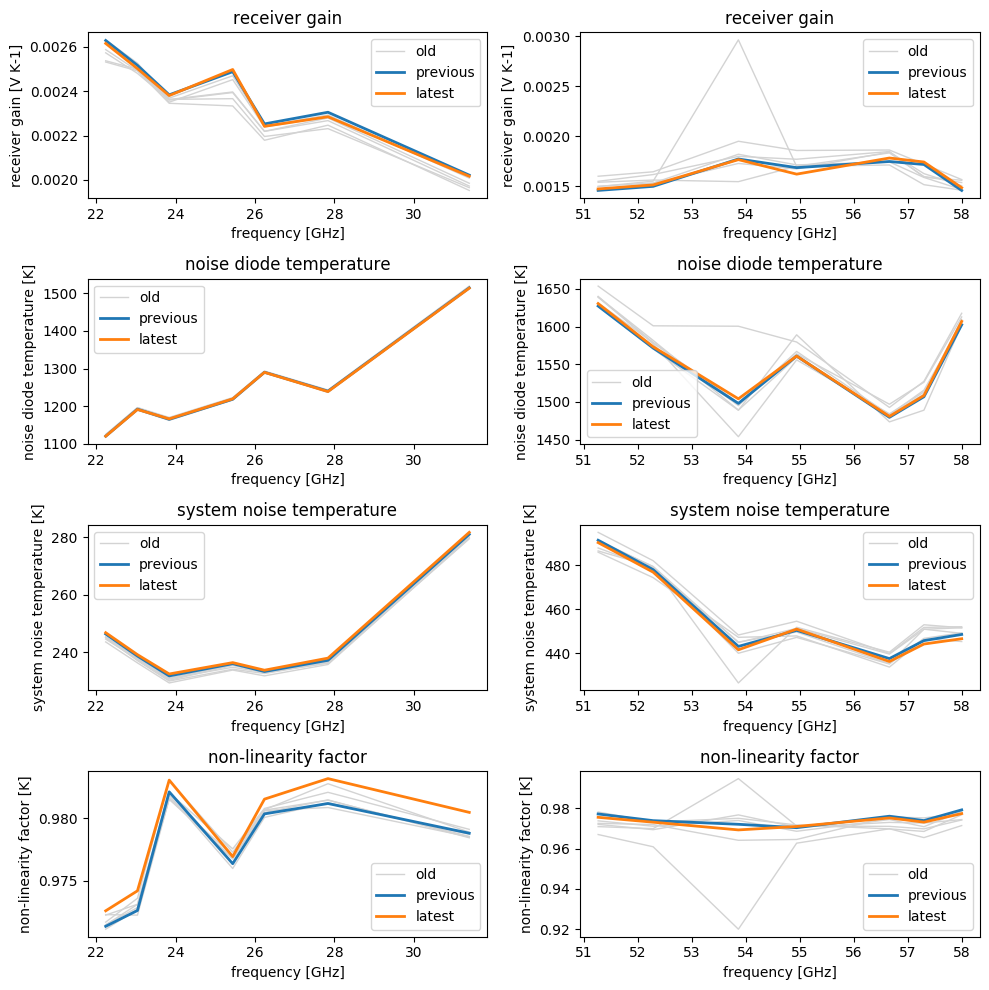

In [18]:

ds_small = ds[['gain', 'temp_noise', 'temp_sys', 'alpha']]

with plt.style.context(['default']):
    
    figure, ax = plt.subplots(4, 2, figsize=(10,4*2.5))

    latest_plot_kwargs={'lw':'2'}
    second_latest_plot_kwargs={'lw':'2'}
    older_plot_kwargs={'lw':'1', 'color':'lightgrey'}

    i=0
    for vars in ds_small.data_vars:
        #print(vars)
        ds_small.isel(n_samples=slice(1,-2), freq=slice(0,7))[vars].plot(hue='n_samples', ax=ax[i,0], label='', **older_plot_kwargs)
        ds_small.isel(n_samples=0, freq=slice(0,7))[vars].plot(hue='n_samples', ax=ax[i,0], label='old', **older_plot_kwargs)
        ds_small.isel(n_samples=-2, freq=slice(0,7))[vars].plot(hue='n_samples', ax=ax[i,0], label='previous', **second_latest_plot_kwargs)
        ds_small.isel(n_samples=-1, freq=slice(0,7))[vars].plot(hue='n_samples', ax=ax[i,0], label='latest', **latest_plot_kwargs)
        ax[i,0].set_title(ds_small[vars].attrs['long_name'])
        ax[i,0].legend()

        ds_small.isel(n_samples=slice(1,-2), freq=slice(7,14))[vars].plot(hue='n_samples', ax=ax[i,1], label='', **older_plot_kwargs)
        ds_small.isel(n_samples=0, freq=slice(7,14))[vars].plot(hue='n_samples', ax=ax[i,1], label='old', **older_plot_kwargs)
        ds_small.isel(n_samples=-2, freq=slice(7,14))[vars].plot(hue='n_samples', ax=ax[i,1], label='previous', **second_latest_plot_kwargs)
        ds_small.isel(n_samples=-1, freq=slice(7,14))[vars].plot(hue='n_samples', ax=ax[i,1], label='latest', **latest_plot_kwargs)
        ax[i,1].set_title(ds_small[vars].attrs['long_name'])
        ax[i,1].legend()

        i=i+1

    plt.tight_layout()
    #plt.show()
    plt.savefig('results_ln2_cal.png')